In [11]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Open model

In [12]:
with open("rf_model.pkl","rb") as f:
    rf_model = pickle.load(f)

# Load inference data set

In [13]:
X = np.loadtxt("inference.txt")
print(X.shape)

(15, 10)


# Run inference

In [16]:
%%time
Y = 100 * rf_model.predict(X) # Units: cm

CPU times: user 107 ms, sys: 39.2 ms, total: 146 ms
Wall time: 221 ms


(array([6., 5., 2., 0., 1., 0., 0., 0., 0., 1.]),
 array([-2.39076657, -0.39480966,  1.60114726,  3.59710417,  5.59306108,
         7.58901799,  9.5849749 , 11.58093181, 13.57688872, 15.57284563,
        17.56880254]),
 <BarContainer object of 10 artists>)

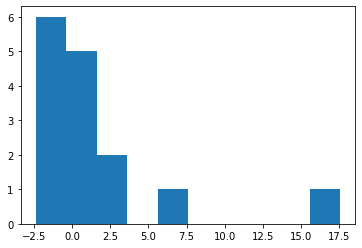

In [17]:
plt.hist(Y)

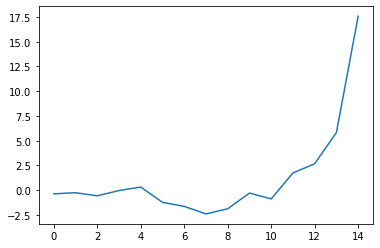

In [18]:
plt.plot(Y)